### 문제(Problem), 시나리오

In [ ]:
# 예제에서 사용할 엑셀은 아래와 같이 생겼습니다.

<img src="figures/038_회귀_지휘관_xlsx.PNG" alt="Drawing" style="width: 500px;"/>

In [1]:
# 차트 패키지를 import합니다.
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 180 # 차트 해상도 설정
plt.rcParams['figure.figsize'] = [4, 3] # setting figure size
import seaborn as sns

In [3]:
# pandas: 데이터 조작 및 분석을 위한 라이브러리
import pandas as pd

In [13]:
# 엑셀에서 읽어와 보세요
df = pd.read_excel('data/038_회귀_지휘관.xlsx', sheet_name='data')

In [14]:
df.head()

,IQ,체력,가족수,키,잠재력
0,107,63,2,185,76
1,127,82,4,169,90
2,129,81,3,167,86
3,101,63,4,179,70
4,101,64,3,173,75


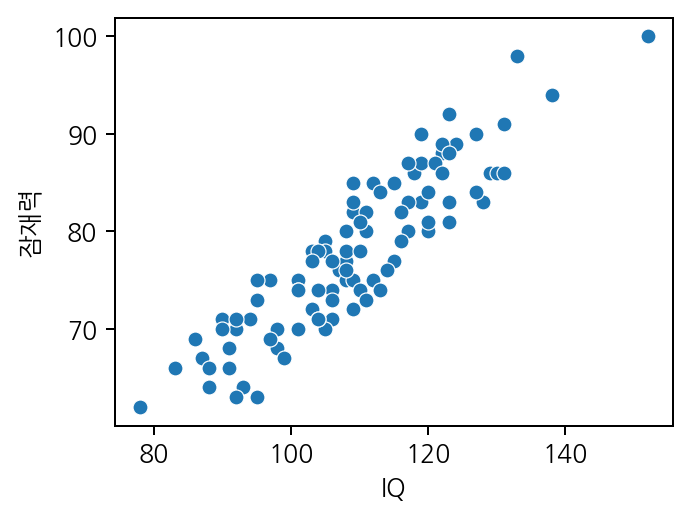

In [16]:
sns.scatterplot(x=df['IQ'], y=df['잠재력'])
# plt.title('Scatter Plot', fontsize=13)
plt.show()

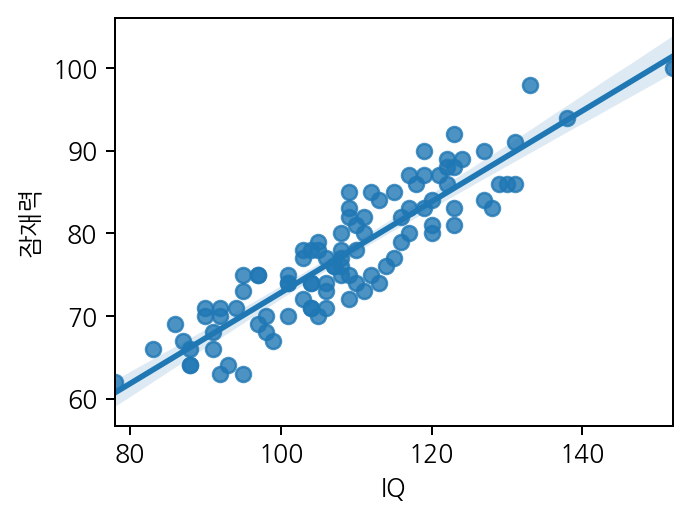

In [11]:
# Scatter Plot with regression line by seaborn regplot()
sns.regplot(x=df['IQ'], y=df['잠재력'], fit_reg=True)
#plt.title('Scatter Plot with Regression Line', fontsize=13)
plt.show()

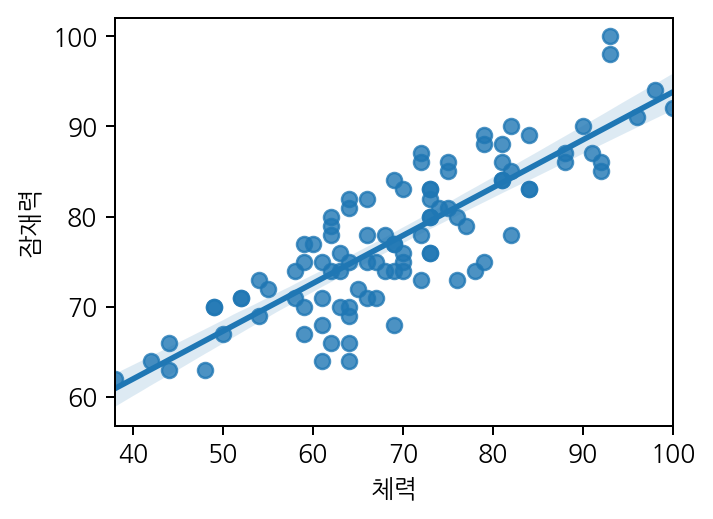

In [12]:
# df.plot.scatter('체력', 'target', figsize=(4, 3))
sns.regplot(x=df['체력'], y=df['잠재력'], fit_reg=True)
plt.show()

![Image](https://annalyzin.files.wordpress.com/2016/01/regression-residual-simulation-tutorial2.gif?w=561&amp;h=84)  
*source of image : https://www.kdnuggets.com/2016/04/regression-correlation-military-tutorial.html/2*

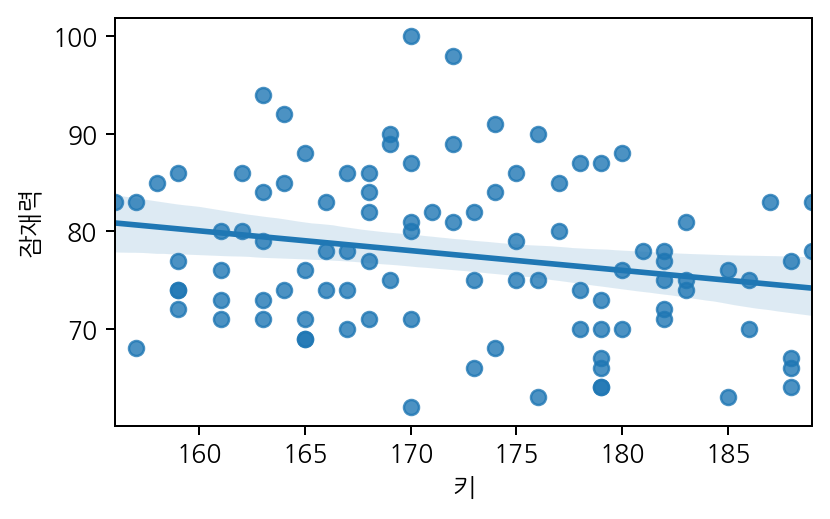

In [10]:
sns.regplot(x=df['키'], y=df['잠재력'], fit_reg=True)
plt.show()

In [11]:
# sns.regplot?

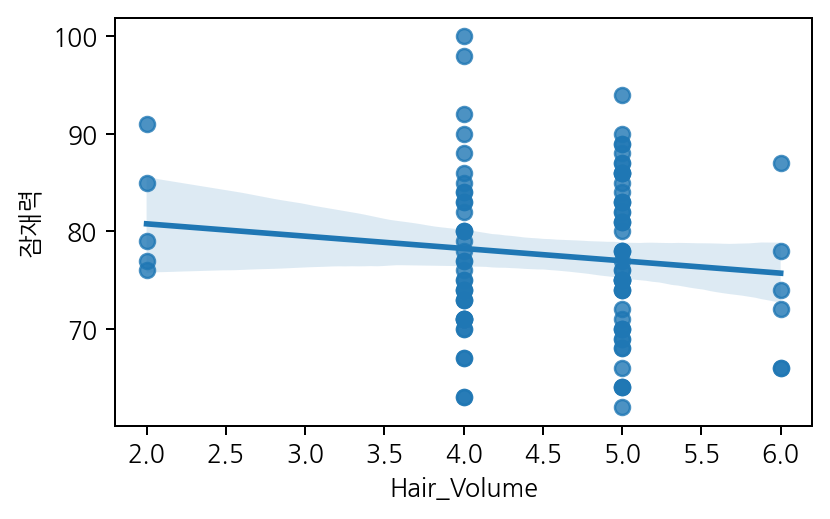

In [12]:
g = sns.regplot(x=df['Hair_Volume'], y=df['잠재력'], fit_reg=True)
g.set(xlim=(1.8, 6.2)) # x축이 안 예쁘서 그린다.
plt.show()

In [13]:
# 추세선은 큰 의미가 없다. 데이터를 반영한 추세선이 아니다.

### 예측 변수 비교 :

In [17]:
# 상관계수 확인
df.corr()

,IQ,체력,Hair_Volume,키,잠재력
IQ,1.000000,0.746922,-0.158467,-0.212427,0.902030
체력,0.746922,1.000000,-0.092262,-0.244116,0.837983
Hair_Volume,-0.158467,-0.092262,1.000000,-0.160706,-0.127961
키,-0.212427,-0.244116,-0.160706,1.000000,-0.222541
잠재력,0.902030,0.837983,-0.127961,-0.222541,1.000000


![Image](https://annalyzin.files.wordpress.com/2016/01/correlation-coefficient-tutorial-simulation.gif?w=669&amp;h=669)  
*source of image : https://www.kdnuggets.com/2016/04/regression-correlation-military-tutorial.html/*

In [18]:
df['combined_attr'] = 0.9*df.IQ + 0.74*df.체력

In [19]:
df.head()

,IQ,체력,Hair_Volume,키,잠재력,combined_attr
0,107,63,2,185,76,142.92
1,127,82,4,169,90,174.98
2,129,81,5,167,86,176.04
3,101,63,4,179,70,137.52
4,101,64,5,173,75,138.26


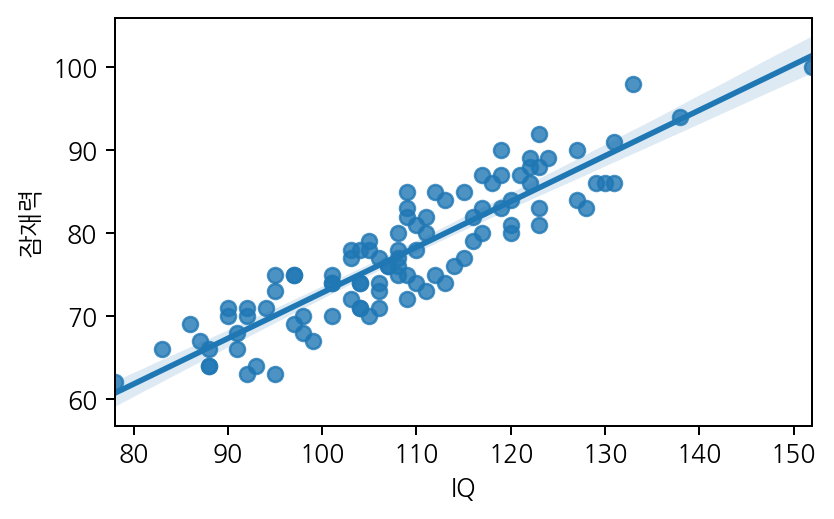

In [22]:
g = sns.regplot(x=df['IQ'], y=df['잠재력'], fit_reg=True)
#g.set(xlim=(1.8, 6.2)) # x축이 안 예쁘서 그린다.
plt.show()

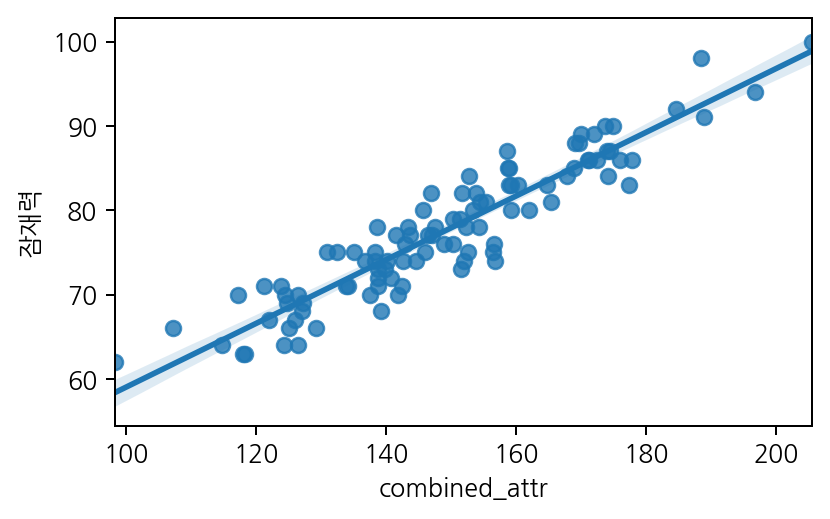

In [20]:
g = sns.regplot(x=df['combined_attr'], y=df['잠재력'], fit_reg=True)
#g.set(xlim=(1.8, 6.2)) # x축이 안 예쁘서 그린다.
plt.show()

In [23]:
df.corr()

,IQ,체력,Hair_Volume,키,잠재력,combined_attr
IQ,1.000000,0.746922,-0.158467,-0.212427,0.902030,0.949401
체력,0.746922,1.000000,-0.092262,-0.244116,0.837983,0.917955
Hair_Volume,-0.158467,-0.092262,1.000000,-0.160706,-0.127961,-0.138120
키,-0.212427,-0.244116,-0.160706,1.000000,-0.222541,-0.242040
잠재력,0.902030,0.837983,-0.127961,-0.222541,1.000000,0.933964
combined_attr,0.949401,0.917955,-0.138120,-0.242040,0.933964,1.000000


In [ ]:
dataset = df.values

In [36]:
#import numpy as np
#import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
df.head()

,IQ,체력,Hair_Volume,키,잠재력,combined_attr
0,107,63,2,185,76,142.92
1,127,82,4,169,90,174.98
2,129,81,5,167,86,176.04
3,101,63,4,179,70,137.52
4,101,64,5,173,75,138.26


In [42]:
y = dataset[:,4]

### IQ만 사용

In [53]:
X = dataset[:,0:1]
X_train, y_train = X, y
estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_predict = estimator.predict(X_train) 
r2 = metrics.r2_score(y_train, y_predict)
print(r2) #1.0

0.8136584198061416


### combined_attr 사용

In [46]:
X = dataset[:,5:6]

In [48]:
X[:3]

array([[142.92],
       [174.98],
       [176.04]])

In [49]:
X_train, y_train = X, y
estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_predict = estimator.predict(X_train) 
r2 = metrics.r2_score(y_train, y_predict)
print(r2) #1.0

0.8722892008221459


# IQ, 체력 사용

In [40]:
df.head()

,IQ,체력,Hair_Volume,키,잠재력,combined_attr
0,107,63,2,185,76,142.92
1,127,82,4,169,90,174.98
2,129,81,5,167,86,176.04
3,101,63,4,179,70,137.52
4,101,64,5,173,75,138.26


In [61]:
X = dataset[:,0:2]
y = dataset[:,4]

In [62]:
X[:3]

array([[107.,  63.],
       [127.,  82.],
       [129.,  81.]])

In [69]:
X_train, y_train = X, y
estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_predict = estimator.predict(X_train) 
r2 = metrics.r2_score(y_train, y_predict)
print(r2) #1.0

0.8746698176081334


In [70]:
estimator.coef_, estimator.intercept_ 

(array([0.38105772, 0.23537992]), 19.830408799766595)

In [65]:
#estimator?